<a href="https://colab.research.google.com/github/proinsiasR/PythonMathDrawings/blob/main/CLTploting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt


In [35]:
# simulation parameters
population_size = 2.3e5

sample_size = 500
sample_numbers = 500

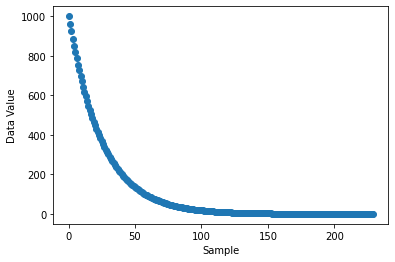

In [36]:
# generate the population of numbers
population = 1/np.logspace(np.log10(.001),np.log10(10),int(population_size))
# true mean
true_mean = np.mean(population)
        

skip = int(1e3)
plt.plot(population[::skip], 'o')
plt.xlabel("Sample")
plt.ylabel("Data Value")
plt.show()

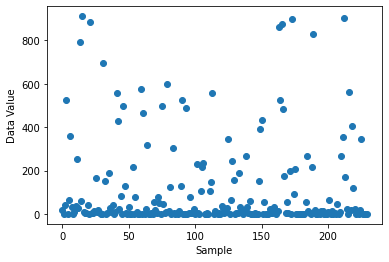

In [37]:
# shuffle data
np.random.shuffle(population)
skip = int(1e3)
plt.plot(population[::skip], 'o')
plt.xlabel("Sample")
plt.ylabel("Data Value")
plt.show()

In [38]:
sample_means = np.zeros(sample_numbers)

for expi in range(sample_numbers):
  sample_means[expi] = np.mean(np.random.choice(population, size=sample_size))


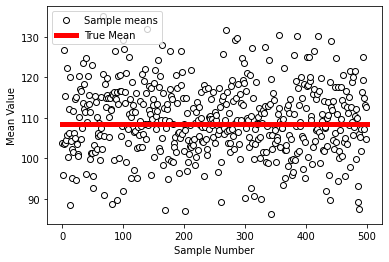

In [39]:
plt.plot(sample_means, 'ok', markerfacecolor='w', label='Sample means')
plt.plot([0, sample_numbers], [true_mean, true_mean], 'r', linewidth=5, label="True Mean")
plt.legend()
plt.xlabel("Sample Number")
plt.ylabel("Mean Value")
plt.show()

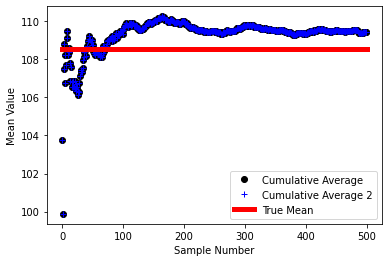

In [40]:
# cumulative average
cume_avg = np.zeros(sample_numbers)
for i in range(sample_numbers):
  cume_avg[i] = np.mean(sample_means[:i+1])

cume_avg2 = np.cumsum(sample_means) / np.arange(1,sample_numbers+1)

plt.plot(cume_avg, 'ko', label="Cumulative Average")
plt.plot(cume_avg2, 'b+', label="Cumulative Average 2")
plt.plot([0, sample_numbers], [true_mean, true_mean], 'r', linewidth=5, label="True Mean")
plt.legend()
plt.xlabel("Sample Number")
plt.ylabel("Mean Value")
plt.show()

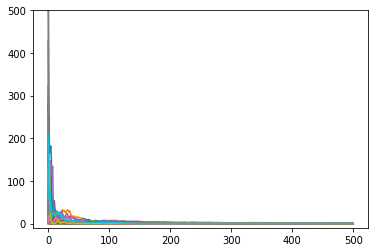

In [53]:
number_of_meta_samples = 100

cume_avges = np.zeros((number_of_meta_samples, sample_numbers))
allsamplemeans = np.zeros((number_of_meta_samples, sample_numbers))

for metai in range(number_of_meta_samples):
  for expi in range(sample_numbers):
    sample_means[expi] = np.mean(np.random.choice(population, size=sample_size))
# cumulative average divergences

  temp = np.cumsum(sample_means) / np.arange(1, sample_numbers+1)
  cume_avges[metai,:] = (temp-true_mean)**2
  # collect sample means
  allsamplemeans[metai,:] = sample_means
# plot
plt.plot(cume_avges.T)
plt.ylim([-10, 500])
plt.show()

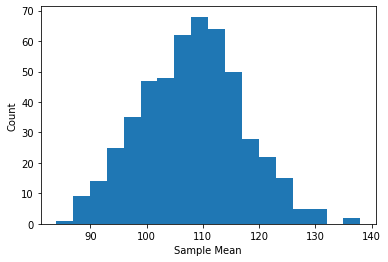

In [54]:
plt.hist(sample_means, bins='fd') # Freedman-Diaconis
plt.xlabel("Sample Mean")
plt.ylabel("Count")
plt.show()

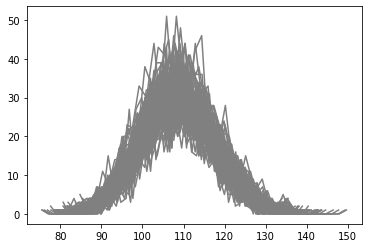

In [58]:
nbins = 40

for i in range(number_of_meta_samples):
  y,x = np.histogram(allsamplemeans[i,:], bins=nbins)
  x = (x[1:]+x[:-1])/2
  plt.plot(x,y, color=[.5,.5,.5])

plt.show()
